In [62]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras_tqdm import TQDMNotebookCallback
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint


# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training set ', x_train.shape, y_train.shape)
print('Test set ', x_test.shape, y_test.shape)

Training set  (60000, 28, 28) (60000,)
Test set  (10000, 28, 28) (10000,)


In [76]:
image_size = 28
num_channels = 1
pixel_depth = 255
num_classes = 10
epochs = 10
batch_size=32
model_dir='mnist_dir/'
model_arch_file = model_dir + 'model_arch.json'
model_checkPoint_file = model_dir + 'model_checkpoint.h5'
model_final_file = model_dir + 'model_final.h5'
keras.utils.to_categorical(y_test, num_classes).shape

(10000, 10)

In [77]:
#reformat
def reformat(dataset, labels):
    dataset = dataset.reshape(-1, image_size, image_size, num_channels).astype(np.float32)
    dataset /= pixel_depth
    labels = (np.arange(num_classes) == labels[:,None]).astype(np.float32)
    #keras.utils.to_categorical(y_test, num_classes).shape
    return dataset, labels

train_dataset, train_labels = reformat(x_train, y_train)
test_dataset, test_labels = reformat(x_test, y_test)
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (60000, 28, 28, 1) (60000, 10)
Test set (10000, 28, 28, 1) (10000, 10)


In [78]:
#model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=train_dataset.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model_json = model.to_json()
with open(model_arch_file, 'w') as f:
    f.write(model_json)

In [79]:
#Train
with open(model_arch_file, 'r') as f:
    model_json = f.read()
    model = model_from_json(model_json)
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
callbacks = [ModelCheckpoint(model_checkPoint_file, verbose=1), TQDMNotebookCallback(leave_inner=True)]
history_model = model.fit(train_dataset, train_labels, batch_size, epochs=epochs, verbose=0, 
                        validation_data=(test_dataset, test_labels), shuffle=True, callbacks=callbacks)
model.save(model_final_file)

A Jupyter Widget

A Jupyter Widget

Epoch 00000: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00001: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00002: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00003: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00004: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00005: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00006: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00007: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00008: saving model to mnist_dir/model_checkpoint.h5


A Jupyter Widget

Epoch 00009: saving model to mnist_dir/model_checkpoint.h5



 9888/10000 [============================>.] - ETA: 0s
 Test Loss: 0.168696533729
Test Accuracy 0.9737
dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


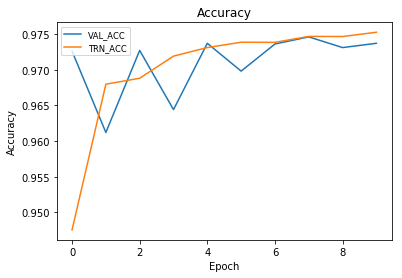

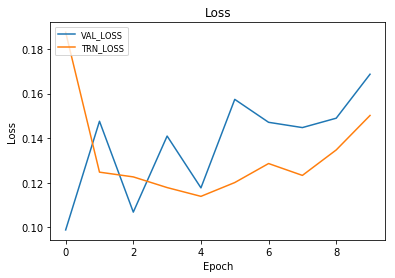

In [80]:
score = model.evaluate(test_dataset, test_labels)
print('\n','Test Loss:', score[0])
print('Test Accuracy', score[1])
print(history_model.history.keys())
val = plt.plot(history_model.history['val_categorical_accuracy'], label='VAL_ACC')
trn = plt.plot(history_model.history['categorical_accuracy'], label='TRN_ACC')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=2, fontsize="small")
plt.show()
plt.plot(history_model.history['val_loss'], label='VAL_LOSS')
plt.plot(history_model.history['loss'], label='TRN_LOSS')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc=2, fontsize="small")
plt.show()